In [1]:
from AlexNet import AlexNet
import matplotlib.pyplot as plt 
from PlywoodDataset import PlywoodDataset
import torch
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import warnings

warnings.filterwarnings("ignore")

In [2]:
labels = "labels.csv"
img_dir = "data"
transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Resize((227, 227)),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ]
)

In [3]:
dataset = PlywoodDataset(annotation_file=labels, img_dir=img_dir, transform=transform)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 227, 227])


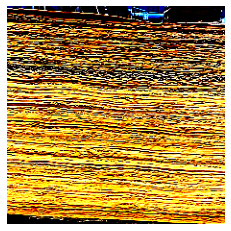

In [4]:
img, label = dataset[0]

print(img.shape)
plt.imshow(img.squeeze().permute(1, 2, 0))
plt.axis("off")
plt.show()

In [5]:
net = AlexNet()
optimizer = torch.optim.Adam(net.parameters(), lr=1e-3)
loss_function = torch.nn.SmoothL1Loss()

In [6]:
BATCH_SIZE = 5
NUM_EPOCH = 50
train_loader = DataLoader(
    dataset=dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,
)

In [9]:
acc_loss = 0
for epoch in range(NUM_EPOCH):
    print(f"epoch {epoch}")
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        
        optimizer.zero_grad()
       
        outputs = net(inputs)
        loss = loss_function(outputs, labels)
        
        acc_loss = loss.item()
        loss.backward()
        optimizer.step()
    print(
        f"loss: {acc_loss}\n-------------------------------------------------------------------------------"
    )
    torch.save(net.state_dict(), f"alexnet/alexnet_epoch{epoch}.pt")

epoch 0
loss: 67.20584106445312
-------------------------------------------------------------------------------
epoch 1
loss: 58.7713623046875
-------------------------------------------------------------------------------
epoch 2
loss: 53.3525276184082
-------------------------------------------------------------------------------
epoch 3
loss: 61.07969284057617
-------------------------------------------------------------------------------
epoch 4
loss: 67.47330474853516
-------------------------------------------------------------------------------
epoch 5
loss: 50.515289306640625
-------------------------------------------------------------------------------
epoch 6
loss: 99.03826904296875
-------------------------------------------------------------------------------
epoch 7
loss: 24.375152587890625
-------------------------------------------------------------------------------
epoch 8
loss: 1.8370800018310547
-----------------------------------------------------------------------